# Исследование компьютерных игр

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Вам нужно выявить определяющие успешность игры закономерности.**

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Шаг 1 Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

pd.set_option('max_columns', None) # показывать все столбцы df
pd.set_option('max_rows', None) # показывать все строки df

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('https://.../games.csv')

In [3]:
games.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB


In [4]:
games.shape

(16715, 11)

In [5]:
games.index

RangeIndex(start=0, stop=16715, step=1)

In [6]:
# изменим срзу написание названий столбцов на нижний регистр
games.columns = games.columns.str.lower()

In [7]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7188,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,0.16,0.06,0.0,0.00,NaN,NaN,NaN
6032,The BIGS 2,Wii,2009.0,Sports,0.26,0.01,0.0,0.02,68.0,8.5,E10+
6344,Fantastic 4,XB,2005.0,Action,0.20,0.06,0.0,0.01,62.0,6.6,T
8894,Deponia,PC,2012.0,Adventure,0.00,0.13,0.0,0.02,74.0,8.2,NaN
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN


In [9]:
games.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [10]:
# вывод пропущенных значений в абсолютных значениях значение по категориям
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
# вывод пропущенных значений, в % по категориям
round(games.isnull().mean(),2)*100

name                0.0
platform            0.0
year_of_release     2.0
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.0
user_score         40.0
rating             40.0
dtype: float64

In [12]:
# проверка на явные дубликаты
games.duplicated().sum()

0

In [13]:
# описательная статистика по столбцам с количественными данными
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [14]:
# распределение количества выпусков названий игр (реализов), 10 верхних значений
games['name'].value_counts(dropna=False).head(10)

Need for Speed: Most Wanted                12
Madden NFL 07                               9
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
FIFA 14                                     9
Lego Batman 3: Beyond Gotham                8
FIFA Soccer 13                              8
LEGO Star Wars II: The Original Trilogy     8
The LEGO Movie Videogame                    8
FIFA 15                                     8
Name: name, dtype: int64

In [15]:
# распределение по количеству игр выпущенных на разных платформах, 10 верхних значений
games['platform'].value_counts(dropna=False).head(10)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: platform, dtype: int64

In [16]:
# распределение по количеству игр выпущенных в разных жанрах
games['genre'].value_counts(dropna=False)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: genre, dtype: int64

In [17]:
# распределение по количеству оценок пользователей, 10 верхних значений
games['user_score'].value_counts(dropna=False).head(10)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
Name: user_score, dtype: int64

In [18]:
# распределение по количеству оценок рейтинга
games['rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

**Выводы по Шагу 1**

информация по датафрейму:
- размер: 11 колонок, 16 715 строк, 5.6 MB
- индекс числовой с шагом 1
- колонки тип данных - float64(6), object(5)

информация по общим данным (предварительные данные, сырые, необработанные):
- пропущены значения в столбцах Name, Year_of_Release, Genre, Critic_score, User_score, Rating
- много пропущенных значений Critic_Score-51%, User_Score-40%, Rating-40% - возможно многие игры просто не оцениваются
- полных дупликатов нет 

возможные причины пропусков:
- данные собирались из открытых и видимо разных источников, т.е. структура данных могла не совпадать в разных базах, в первую очередь это касается столбцов Critic_score, User_score, Rating
- пропуски в столбце Name и Genre м.б. ошибкой загрузки данных
- пропущенные значения в Year_of_Releas могли быть не указанны в источнике данных

можно поменять типы данных в name, genre, rating на category, user_score на float, year_of_release на int

# Шаг 2  Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


**название столбцов на нижний регистр изменили в начале**

In [19]:
# изменим тип данных столбцов name, genre, rating 
games['name'] = games['name'].astype('category')
games['genre'] = games['genre'].astype('category')

In [20]:
# посмотрим на значения nan в столбце name и genre
games[(games['name'].isnull()) | (games['genre'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [21]:
# значения nan в столбце name и genre совпадают, восстановить их трудно, год выпуска очень далекий - можно удалить из df
games = games[~games['name'].isnull()]

In [22]:
# посмотрим на значения nan в столбце year_of_release
games[games['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [23]:
# т.к. конкретные игры выходили на конкретных плаформах, то восстановим пропущенные значения year_of_realise 
# медианным годом работы платформы, в дальнейшем посмотрим на данные, при необходимости изменим

games['year_of_release'] = games['year_of_release'].fillna(games.groupby('platform')['year_of_release'].transform('median'))

In [24]:
# заменим тип данных year_of_release на int
games['year_of_release'] = games['year_of_release'].astype('int')

In [25]:
# проверим значения в столбце critic_score
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [26]:
# проверим значения в столбце user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [27]:
# проверим значения в столбце с рейтингом
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [28]:
# посмотрим на значения nan в столбце critic_score, user_score, rating
games[(games['critic_score'].isnull()) | (games['user_score'].isnull()) | (games['rating'].isnull())].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


**комментарии**

значение tbd в 'user_score' это абривеатура 'to be determined' - "будет определено" (в смысле "будет определено позже")

пропущеные значения в столбцах critic_score, user_score, rating оставим без изменений
- достаточно много 51%, 40% от количества значений в столбце
- совпадают по строкам
- сложно заменить на другие значения т.к. игры (с учетом платформы, года выпуска) различаются и оцениваются экспертами, покупателями в отдельности 

In [29]:
# запишем в отдельный столбец суммарные продажи во всех регионах  
games['all_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [30]:
# проверим снова на явные дубликаты
games.duplicated().sum()

0

In [31]:
# проверка на не явные дубликаты 
games.loc[games[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
4127,Sonic the Hedgehog,PS3,2011,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+,0.48
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


In [32]:
# проверим 'Need for Speed: Most Wanted'  - это не дубликат, а выход на разных платформах и в разные годы
games.loc[(games['name']=='Need for Speed: Most Wanted') & ((games['platform']=='X360') | (games['platform']=='PC'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08


In [33]:
games.loc[(games['name']=='Sonic the Hedgehog') & (games['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,2011,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48


In [34]:
games.loc[(games['name']=='Madden NFL 13') & (games['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [35]:
# игра 'Madden NFL 13' задублирована - удалим дубликат
games = games.drop(index=[16230], axis=0).reset_index(drop=True)

In [36]:
# изменим значения в столбце user_score на float,  tbd переведем в nan
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [37]:
# вывод данных по df после преобразований
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16712 non-null  category
 1   platform         16712 non-null  object  
 2   year_of_release  16712 non-null  int32   
 3   genre            16712 non-null  category
 4   na_sales         16712 non-null  float64 
 5   eu_sales         16712 non-null  float64 
 6   jp_sales         16712 non-null  float64 
 7   other_sales      16712 non-null  float64 
 8   critic_score     8136 non-null   float64 
 9   user_score       7589 non-null   float64 
 10  rating           9948 non-null   object  
 11  all_sales        16712 non-null  float64 
dtypes: category(2), float64(7), int32(1), object(2)
memory usage: 1.7+ MB


In [38]:
round(games.isna().mean(),2) * 100

name                0.0
platform            0.0
year_of_release     0.0
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.0
user_score         55.0
rating             40.0
all_sales           0.0
dtype: float64

**Информация по Шагу 2**
- заменили типы данных в name, platform, genre, years_of_release, rating на category; 
- удалили 2 строки по значениям nan в name, genre т.к. по ним фактически нет других данных и восстановить их в данной ситуации не возможно;
- заменили пропущеные значения в year_of_release на медианные значения по платформам; 
- оставили nan  в столбцах critic_score, user_score, rating т.к. сложно заменить на другие значения на данном этапе;

# Шаг 3 Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?




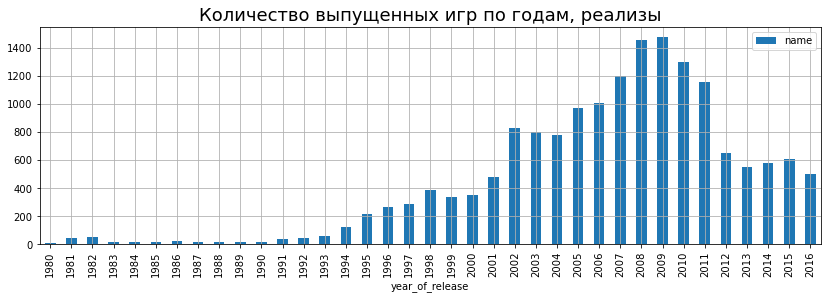

In [39]:
# график по количеству выпущенных игр по годам 
games.groupby('year_of_release')['name'].count().plot(kind='bar',figsize=(14,4),grid=True, legend=True)
plt.title('Количество выпущенных игр по годам, реализы', fontsize=18)
plt.show()

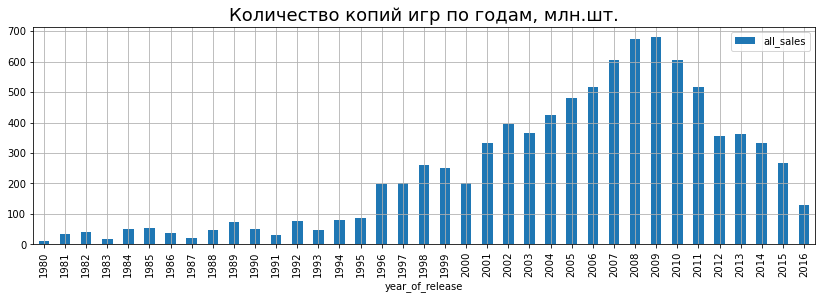

In [40]:
# график общего количества копий игр по годам, миллионы проданных копий
games.groupby('year_of_release')['all_sales'].sum().plot(kind='bar',figsize=(14,4),grid=True, legend=True)
plt.title('Количество копий игр по годам, млн.шт.', fontsize=18)
plt.show()

**коментарии, промежуточные вводы**
- количество реализов и копий игр с 1980г стабильно росло к 2008-2009гг
- аквтиный рост начался с 1995г
- 20010-2016гг стабильное снижение количество реализов и копий игр

Важны ли данные за все периоды?
   - считаю что для оценки рынка в долгосрочной перспективе данные важны все 
   - для данного исследования можно оставить данные с1995, когда начался значительный рост продаж

In [41]:
# список с годами с 1995г
years_list_1995 = list(set(i for i in games.year_of_release.tolist() if i >= 1995))
print(years_list_1995, end='')

[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [42]:
# срез данных с 1995г
games_1995 = games.query('year_of_release in @years_list_1995')

**Задача**

- Посмотрите, как менялись продажи по платформам. 

- Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

- За какой характерный срок появляются новые и исчезают старые платформы?

In [43]:
# сводная таблица продаж по платформам с 1995
games_1995_platform_sales = games_1995.pivot_table(index='platform', columns='year_of_release', values='all_sales',
                                                                                                           aggfunc='sum').T

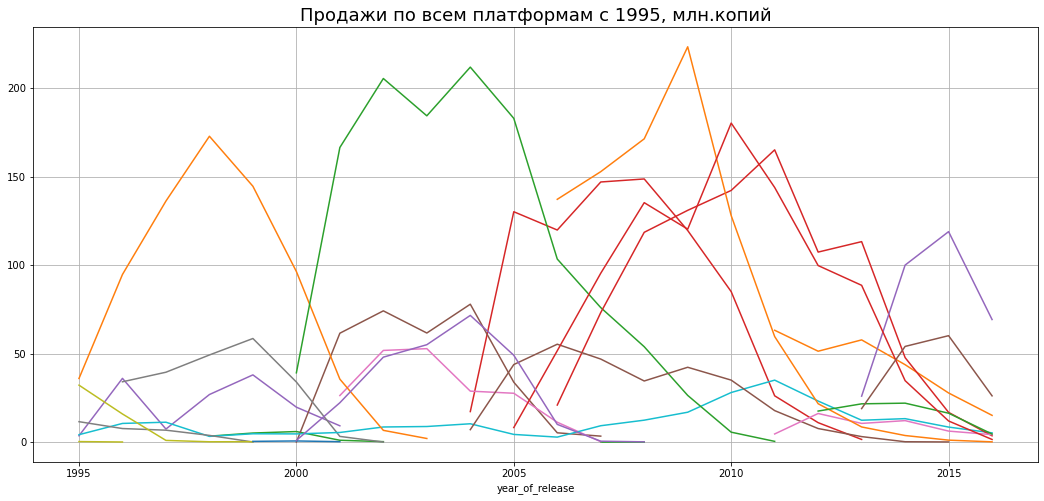

In [44]:
# построим график продаж по платформам с 1995
games_1995_platform_sales.plot(figsize=(18,8), legend=False, grid=True)
plt.title('Продажи по всем платформам с 1995, млн.копий', fontsize=18)
plt.show()

данный график плохо читаем, но тем не не менее видно, что определеные платформы существуют на рынке 7-8 лет, проверим это отдельно по платформам

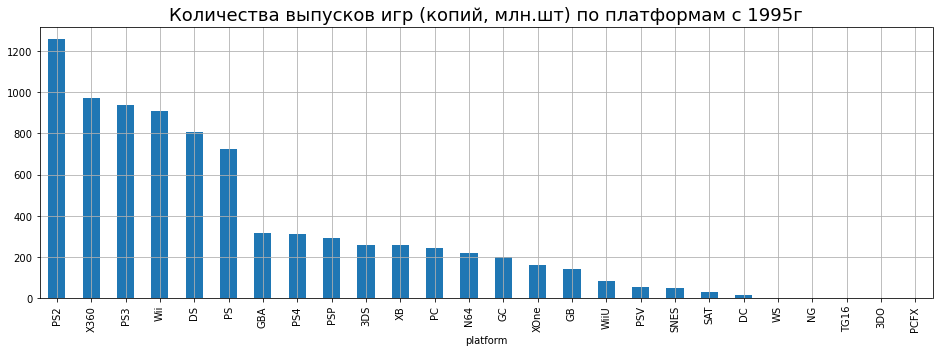

In [45]:
# количества выпусков игр по платформам c 1995г, миллионы проданных копий
games_1995.groupby('platform')['all_sales'].sum().sort_values(ascending=False).\
                                                      plot(kind='bar', x='all_sales',figsize=(16,5),grid=True)
plt.title('Количества выпусков игр (копий, млн.шт) по платформам с 1995г', fontsize=18)
plt.show()

In [46]:
# определим общий объем продаж с 1995
total_sales = games_1995.groupby('platform')['all_sales'].sum().sum()
print('общие продажи с 1995г =', round(total_sales), 'млн. копий')

общие продажи с 1995г = 8243 млн. копий


In [47]:
# отберем платформы продажи которых составляют 80% от общих продаж с 1995
share_80_total_sales_platforms = games_1995.groupby('platform')['all_sales'].sum().sum() * 0.8

# df с данными продаж отсортированными по убыванию 
df_top_sales_platforms = games_1995.groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index()

# пустой список для отбора платформ
top_sales_platforms_list = []

# в цикле внесем в список
x = 0
i = 0
while x < share_80_total_sales_platforms:
    x += df_top_sales_platforms.loc[i, 'all_sales']
    top_sales_platforms_list.append(df_top_sales_platforms.loc[i, 'platform'])
    i += 1

print('лист с названиями top-платформ c 1995г, 80% продаж ', top_sales_platforms_list, sep='\n')

лист с названиями top-платформ c 1995г, 80% продаж 
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', '3DS']


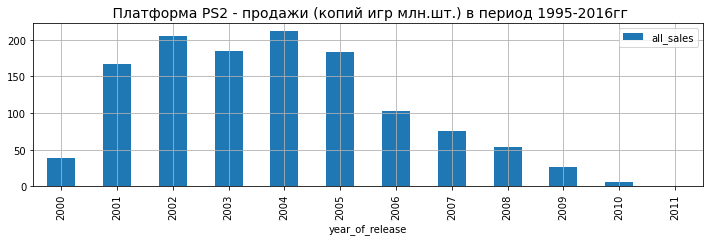

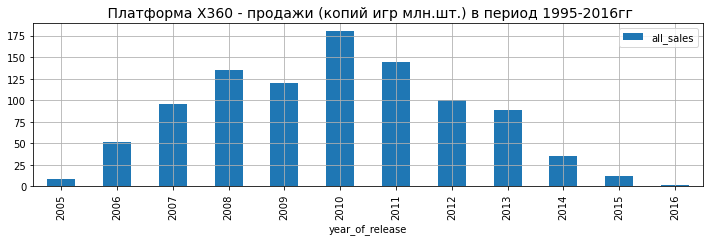

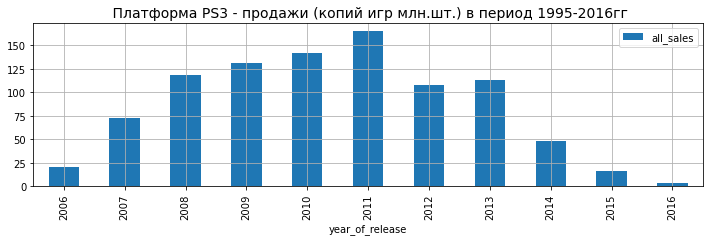

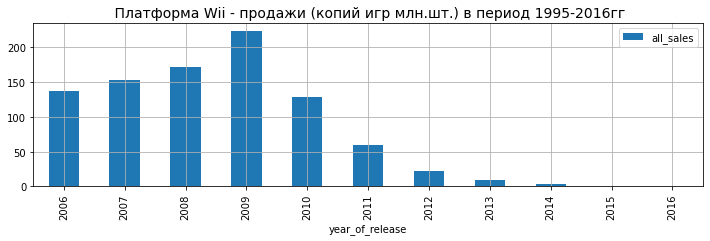

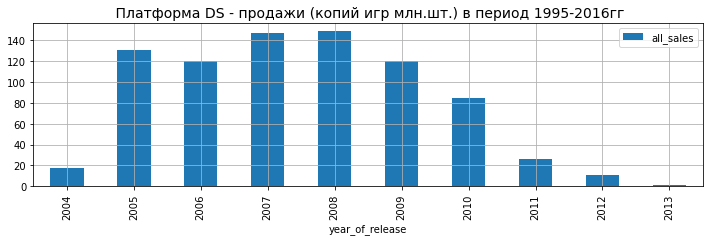

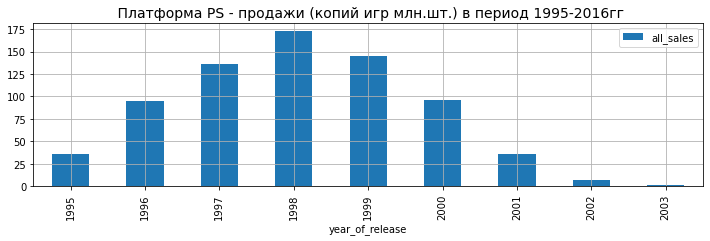

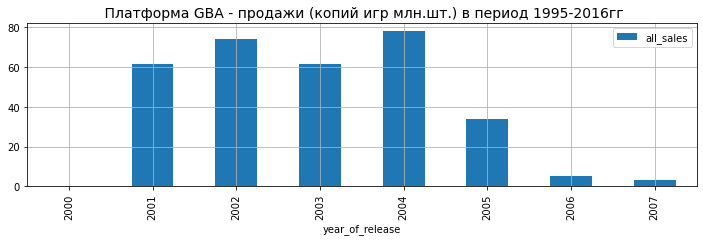

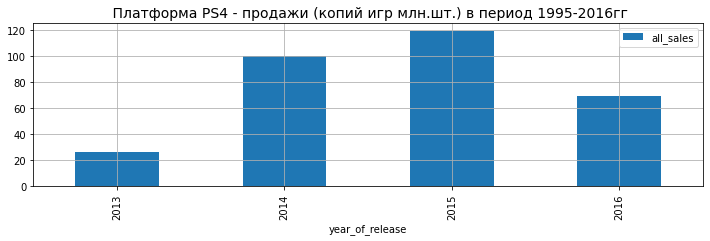

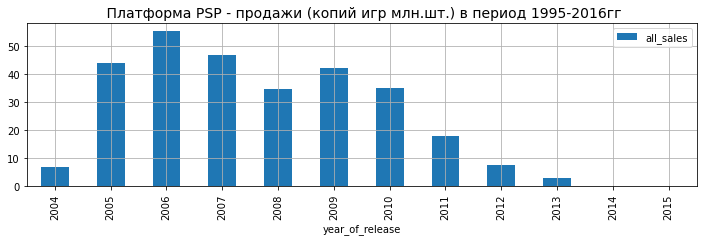

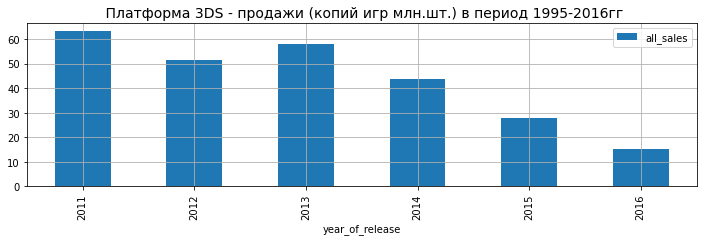

In [48]:
# распределение продаж платформ по годам из списка top_sales_platforms_list в период 1995-2016гг
for name in top_sales_platforms_list:
    games_1995[games_1995['platform']==name].groupby('year_of_release')['all_sales'].sum().\
            reset_index().plot(kind='bar', x='year_of_release', figsize=(12,3), grid=True); 
    plt.title(f' Платформа {name} - продажи (копий игр млн.шт.) в период 1995-2016гг', fontsize=14)
    plt.show()

**коментарии, промежуточные вводы**
- по  распределениям топовых платфор, визуально видно, что характерный срок работы платформы 6-7 лет
- проверим визуальный вывод через расчет 

In [49]:
# расчет срока работы (продаж) платформы в среднем
# 1) делаем срез по столбцам 'platform','year_of_release'
# 2) убираем дубликаты - остаются только строки "платформа-год"  т.е. только те годы когда плотформа выпускала игры
# 3) считаем среднее по всем платформам с 1995
games_1995_platform_year = games_1995[['platform','year_of_release']]
games_1995_platform_year = games_1995_platform_year.drop_duplicates()
print('В среднем в период 1995-2016 определенная платформа работает =',
      round(games_1995_platform_year.groupby('platform')['year_of_release'].count().mean(),2), 'лет')

В среднем в период 1995-2016 определенная платформа работает = 7.19 лет


**комментарии, промежуточные вводы:** 
- наиболее популярные платформы c 1995 это: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', '3DS';
- значительное падение продаж это платформы: 'X360','PS2', 'PS3', 'PS', 'DS', 'Wii', 'GBA', 'PSP'; 
- визуальные наблюдения подтверждаются расчетом, что средний срок работы платформы 7 лет;
  

**Задача**
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

т.к. период популярности платформ в среднем составляет 7 лет, то лучше взять для анализа последние 5 лет:
- новые платформы покажут рост
- старые платформы, которые еще не прекратили работу и м.б. актуальны на 2017г, попадут в анализируемый период


In [50]:
# список годов 
years_list_2012 = [2012, 2013, 2014, 2015, 2016]
years_list_2012

[2012, 2013, 2014, 2015, 2016]

In [52]:
# срез данных с 2012г
games_2012 = games.query('year_of_release in @years_list_2012')

In [53]:
games_2012_platform_sales = games_2012.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

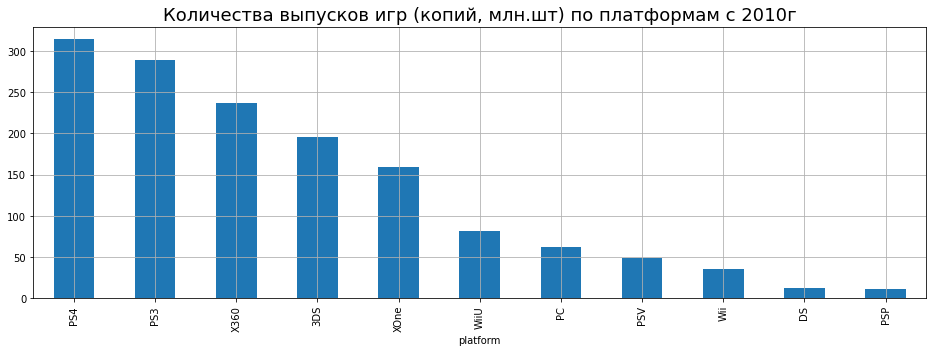

In [54]:
# количества выпусков игр по платформам c 2012г, млн. проданных копий
games_2012_platform_sales.plot(kind='bar', x='all_sales', figsize=(16,5), grid=True)
plt.title('Количества выпусков игр (копий, млн.шт) по платформам с 2010г', fontsize=18)
plt.show()

In [55]:
# продажи в период 2012-2016 с нарастющим итогом по платформам
games_2012_platform_sales_df = games_2012_platform_sales.to_frame().reset_index()
games_2012_platform_sales_df['cumsum'] = games_2012_platform_sales_df['all_sales'].cumsum()
games_2012_platform_sales_df['cumsum %'] = (games_2012_platform_sales_df['cumsum'] / 
                                                                    games_2012_platform_sales_df['all_sales'].sum())
games_2012_platform_sales_df

,platform,all_sales,cumsum,cumsum %
0,PS4,314.14,314.14,0.216952
1,PS3,288.78,602.92,0.416390
2,X360,236.54,839.46,0.579750
3,3DS,195.80,1035.26,0.714973
4,XOne,159.32,1194.58,0.825003
5,WiiU,82.19,1276.77,0.881766
6,PC,62.65,1339.42,0.925033
7,PSV,49.44,1388.86,0.959177
8,Wii,35.37,1424.23,0.983605
9,DS,12.55,1436.78,0.992272


In [56]:
# отберем платформы по которым были 95% продаж в период 2012-2016
top_sales_platforms = list(games_2012_platform_sales_df.head(8)['platform'])
top_sales_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']

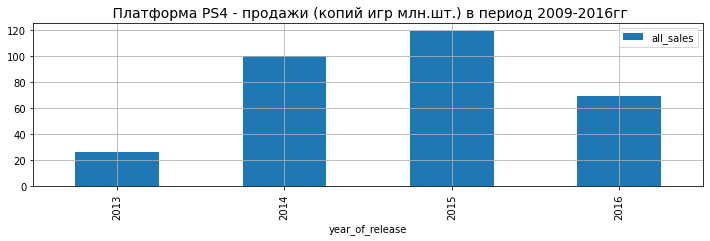

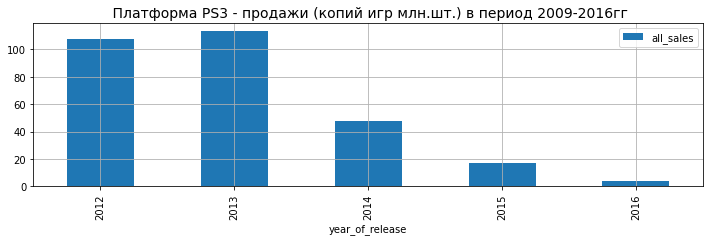

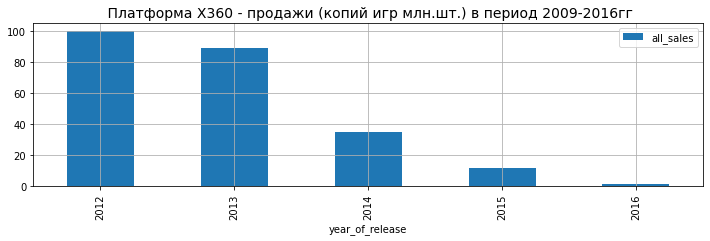

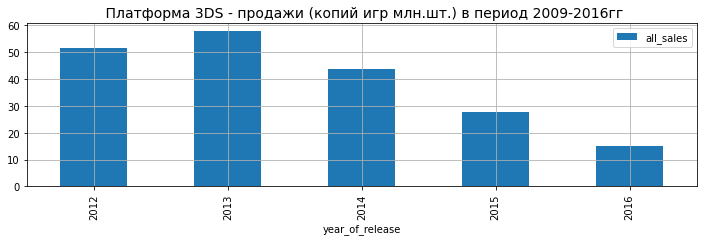

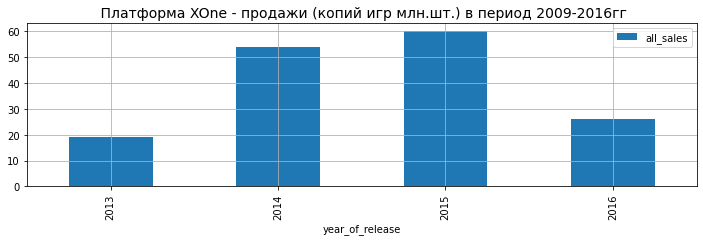

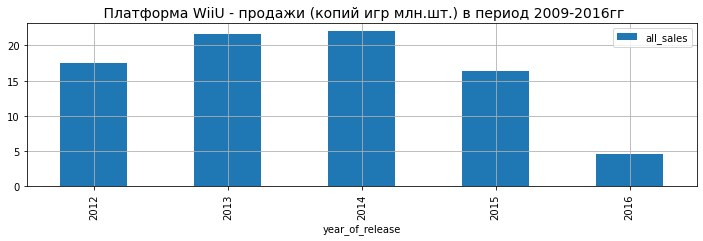

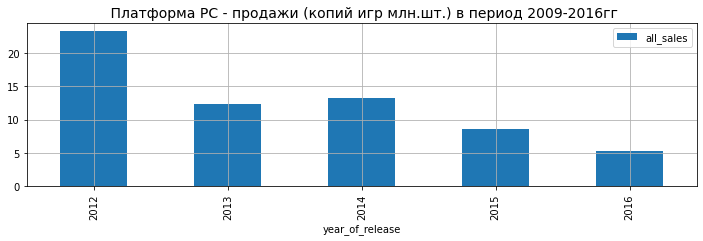

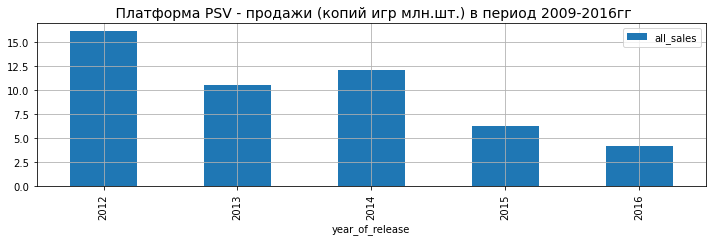

In [57]:
# распределение продаж платформ по годам из списка top_sales_platforms в период 2012-2016гг
for name in top_sales_platforms:
    games_2012[games_2012['platform']==name].groupby('year_of_release')['all_sales'].sum().\
            reset_index().plot(kind='bar', x='year_of_release', figsize=(12,3), grid=True); 
    plt.title(f' Платформа {name} - продажи (копий игр млн.шт.) в период 2012-2016гг', fontsize=14)
    plt.show()

**комментарии, промежуточные вводы:** 
- наиболее популярные платформы c 2010 это: PS3, X360, PS4, 3DS, Wii, XOne - на них проходиться 80% продаж;
- значительное падение продаж это платформы: X360, PS3, PS, DS, PSP; 
- потенциально прибыльные платформы на 2017 это: PS4, 3DS, XOne, PS, WiiU, PSV;

**Задача**
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [58]:
# сформируем новый df на актуальный период и по топ-платформам 
data = games.query('platform in @top_sales_platforms and year_of_release in @years_list_2012').reset_index(drop=True).copy()

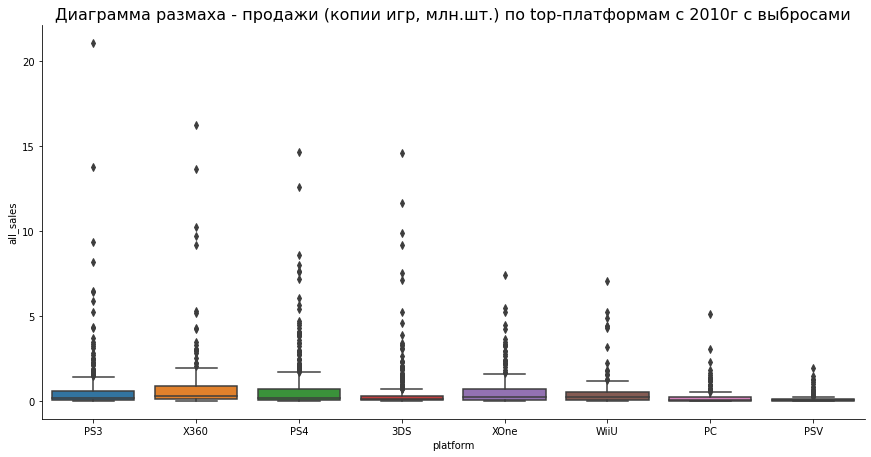

In [59]:
# диаграмма размаха по глобальным продажам игр в разбивке по платформам 
sns.catplot(x='platform', y='all_sales', kind='box', data=data, height=6, aspect=2)
plt.title('Диаграмма размаха - продажи (копии игр, млн.шт.) по top-платформам с 2010г с выбросами', fontsize=16)
plt.show()

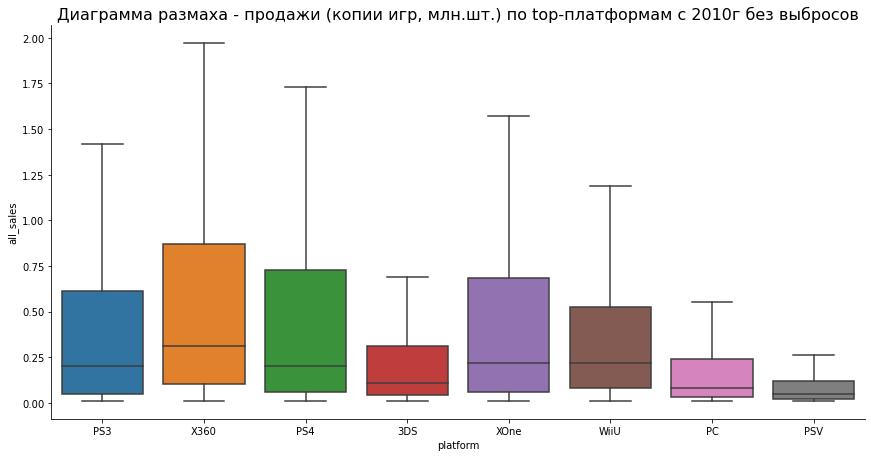

In [60]:
# boxplot по всем top играм без выбросов
sns.catplot(x='platform', y='all_sales', kind='box', data=data , height=6,  aspect=2, showfliers=False);
plt.title('Диаграмма размаха - продажи (копии игр, млн.шт.) по top-платформам с 2010г без выбросов', fontsize=16)
plt.show()

In [61]:
# т.к. на boxplot не очень хорошо видны все значения, ниже добавил таблицу с данными Описательной статистики
data.groupby('platform')['all_sales'].agg(['sum', 'count', 'mean', 'median', 'max', 'std']).\
                            sort_values(by='sum', ascending=False).reset_index()

# sum - продажи во всех странах (миллионы проданных копий)
# count - количество выпущенных игр (названий) по всем годам 
# mean, meadian - это среднее, медианое количество проданных копий на 1 игру
# std - среднеквадратическое отклонение количества проданных копий на 1 игру

,platform,sum,count,mean,median,max,std
0,PS4,314.14,392,0.801378,0.20,14.63,1.609456
1,PS3,288.78,492,0.586951,0.20,21.05,1.464113
2,X360,236.54,292,0.810068,0.31,16.27,1.712069
3,3DS,195.80,404,0.484653,0.11,14.60,1.374274
4,XOne,159.32,247,0.645020,0.22,7.39,1.036139
5,WiiU,82.19,147,0.559116,0.22,7.09,1.058836
6,PC,62.65,250,0.250600,0.08,5.14,0.494640
7,PSV,49.44,412,0.120000,0.05,1.96,0.202882


In [62]:
# посмотрим рейтинг игр по названиям
data.groupby(['name', 'platform'])['all_sales'].sum().sort_values(ascending=False).reset_index().head(10)

,name,platform,all_sales
0,Grand Theft Auto V,PS3,21.05
1,Grand Theft Auto V,X360,16.27
2,Call of Duty: Black Ops 3,PS4,14.63
3,Pokemon X/Pokemon Y,3DS,14.60
4,Call of Duty: Black Ops II,PS3,13.79
5,Call of Duty: Black Ops II,X360,13.68
6,Grand Theft Auto V,PS4,12.62
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,11.68
8,Call of Duty: Ghosts,X360,10.24
9,New Super Mario Bros. 2,3DS,9.90


**комментарии, промежуточные вводы:**

Диаграммы размаха и данные описателной статистики показывают распределение Количества проданных копий игр по Каждой игре (реализу) в разрезе платформ за период 2012-2016 - т.е. Количество проданых копии каждой отдельной игры

   - количество реализов игр по платформам распределены от 147 до 492
   - количество копий игр по платформам распределены от 49 до 314 млн.копий
   - максимальные продажи на 1 игру по платформам распределены от 1.96 до 21.05 млн.копий
   - медианные значения (количества копий на 1 реализ) распределены от 0.05 до 0.31 млн.копий
   
   - наибольшая ширина "ящиков", межквартильного размаха min-max у платформ 'PS3', 'X360', 'Wii','PS4', т.е. у тех 
     платформ, у которых максимальные продами 

   - наибольший разброс по объему продаж на 1 игру у платформ 'PS3', X360', 'PS4', '3DS', т.е. у тех платформ у которых максимальные выбросы 
   
   - наиболее популярные игры за этот период 
       - платформа X360 - 'Grand Theft Auto V', 
       - платформа PS3 - 'Grand Theft Auto V'
       - платформа PS4 - 'Call of Duty: Black Ops 3'
       - платформа DS3 - 'Pokemon Black/Pokemon White'
   


**Задача**
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 
- Сформулируйте выводы.

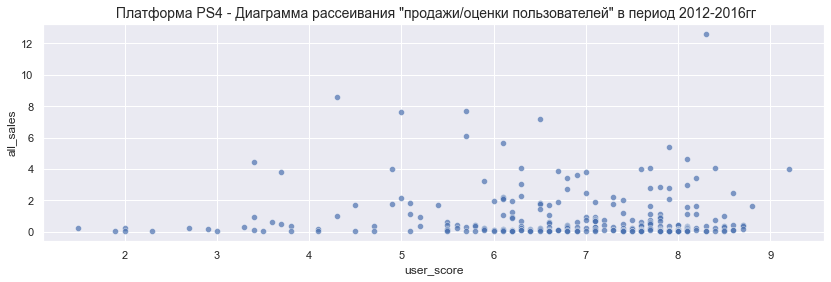

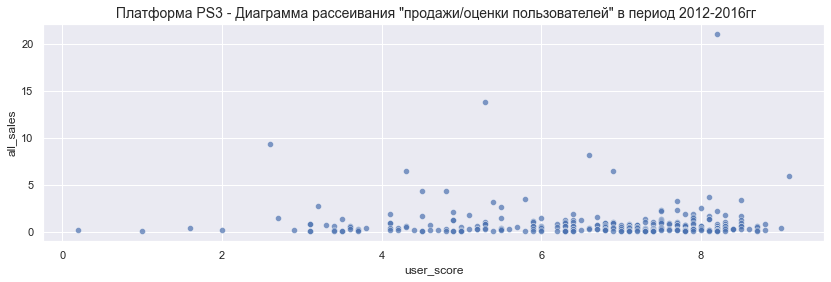

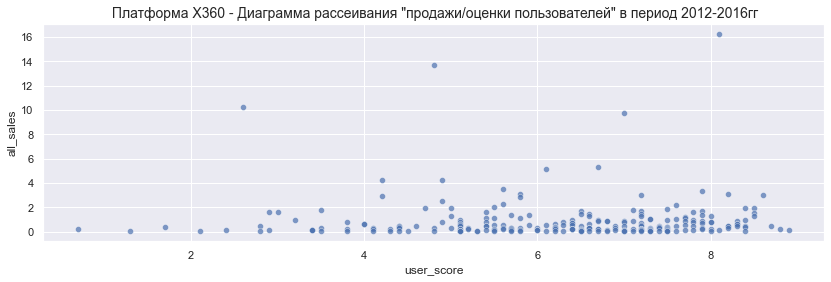

In [63]:
# вывод диаграмм рассеивания продажи/оценки пользователей по трем лидирующим платформам
for name in top_sales_platforms[:3]:
    sns.set(rc = {'figure.figsize':(14,4)})
    sns.scatterplot(data=data.query('platform == @name'), x='user_score', y='all_sales', alpha=0.7)
    plt.title(f' Платформа {name} - Диаграмма рассеивания "продажи/оценки пользователей" в период 2012-2016гг', fontsize=14)
    plt.show()

In [64]:
# коэффициента корреляции продажи/оценки пользователей по трем лидирующим платформам
for i in top_sales_platforms[:3]:
    print('коэффициент корреляции между user_score и all_sales по платформе',i, '=',
          round(data[data['platform'] == i]['user_score'].corr(data['all_sales']),2))

коэффициент корреляции между user_score и all_sales по платформе PS4 = -0.03
коэффициент корреляции между user_score и all_sales по платформе PS3 = -0.01
коэффициент корреляции между user_score и all_sales по платформе X360 = 0.01


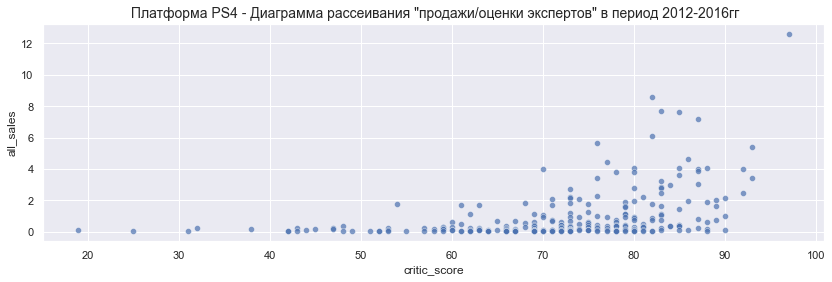

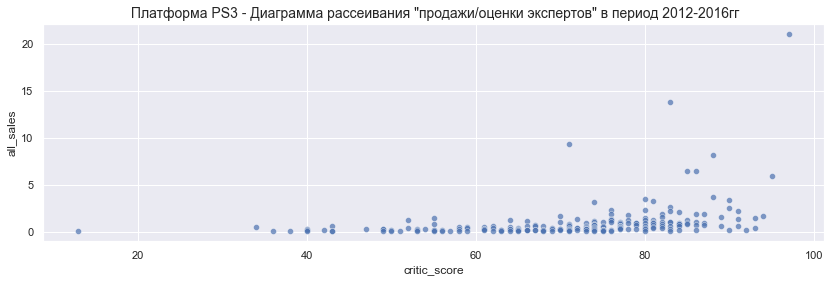

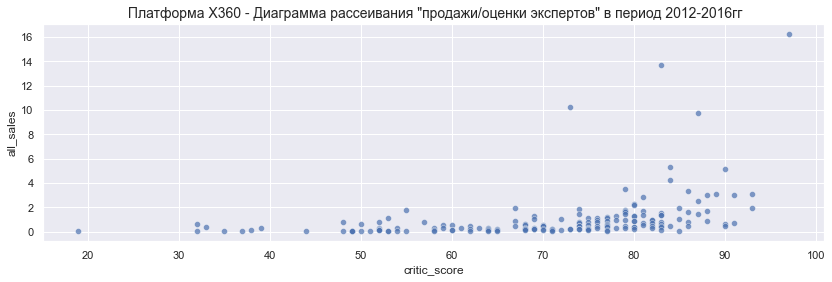

In [65]:
# диаграммы рассеивания продажи/оценки экспертов по трем лидирующим платформам
for name in top_sales_platforms[:3]:
    sns.set(rc = {'figure.figsize':(14,4)})
    sns.scatterplot(data=data.query('platform == @name'), x='critic_score', y='all_sales', alpha=0.7)
    plt.title(f' Платформа {name} - Диаграмма рассеивания "продажи/оценки экспертов" в период 2012-2016гг', fontsize=14)
    plt.show()

In [66]:
# коэффициент корреляции продажи/оценки экспертов по трем лидирующим платформам
for i in top_sales_platforms[:3]:
    print('коэффициент корреляции между critic_score и all_sales по платформе',i, '=',
          round(data[data['platform'] == i]['critic_score'].corr(data['all_sales']),2))

коэффициент корреляции между critic_score и all_sales по платформе PS4 = 0.41
коэффициент корреляции между critic_score и all_sales по платформе PS3 = 0.33
коэффициент корреляции между critic_score и all_sales по платформе X360 = 0.36


In [67]:
# общая матрица корреляции
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.122848,-0.082054,-0.063730,-0.087346,0.018791,-0.022607,-0.112773
na_sales,-0.122848,1.000000,0.763027,0.265466,0.791463,0.293257,-0.018507,0.919400
eu_sales,-0.082054,0.763027,1.000000,0.263507,0.936629,0.284921,-0.022244,0.927754
jp_sales,-0.063730,0.265466,0.263507,1.000000,0.201561,0.116300,0.162151,0.444196
other_sales,-0.087346,0.791463,0.936629,0.201561,1.000000,0.273606,-0.011955,0.911480
critic_score,0.018791,0.293257,0.284921,0.116300,0.273606,1.000000,0.518284,0.310360
user_score,-0.022607,-0.018507,-0.022244,0.162151,-0.011955,0.518284,1.000000,0.002041
all_sales,-0.112773,0.919400,0.927754,0.444196,0.911480,0.310360,0.002041,1.000000


**комментарии, промежуточные вводы:**

- корреляции между оценками пользователей и продажами практическ нет;
- есть корреляция между оценками критиков и продажами, на уровне 0.3-0.4; 

**Задача** 

посмотрите на общее распределение игр по жанрам:
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?"

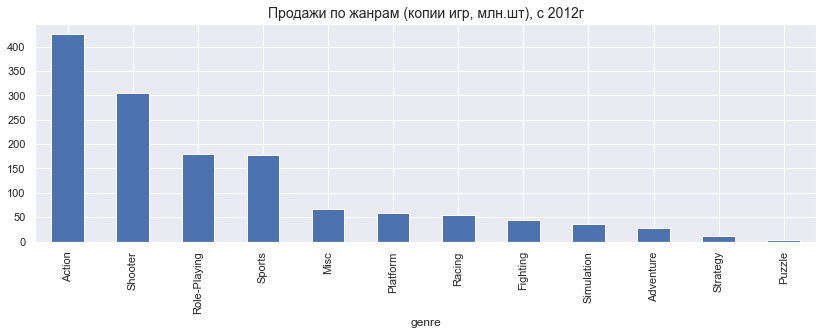

In [68]:
# продажи по жанрам с 2010г
data.groupby('genre')['all_sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(14,4));
plt.title('Продажи по жанрам (копии игр, млн.шт), с 2012г', fontsize=14)
plt.show()

In [69]:
# продажи по жанрам с 2012г
data.groupby('genre')['all_sales'].agg(['sum', 'count', 'mean', 'median', 'max', 'std']).reset_index().\
                                                                        sort_values(by='sum', ascending=False)

,genre,sum,count,mean,median,max,std
0,Action,425.19,933,0.455723,0.130,21.05,1.217242
8,Shooter,304.80,236,1.291525,0.435,14.63,2.248285
7,Role-Playing,180.14,339,0.531386,0.160,14.60,1.305984
10,Sports,177.45,249,0.712651,0.260,8.58,1.170009
3,Misc,66.29,165,0.401758,0.130,9.18,0.989286
4,Platform,58.06,81,0.716790,0.210,9.90,1.385690
6,Racing,53.58,115,0.465913,0.140,7.09,0.888336
2,Fighting,44.13,105,0.420286,0.150,7.55,0.925179
9,Simulation,35.12,78,0.450256,0.120,9.17,1.258791
1,Adventure,27.60,246,0.112195,0.040,1.66,0.227481


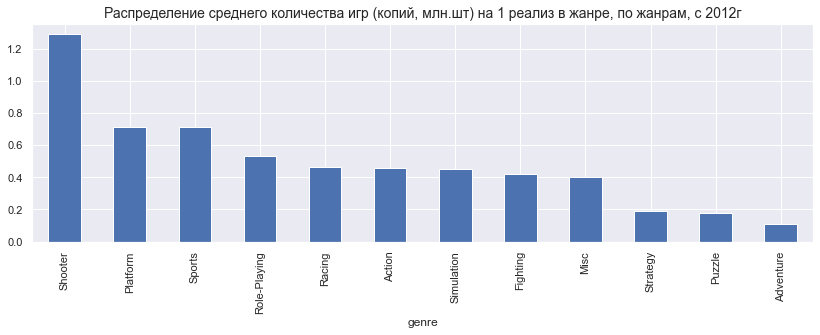

In [70]:
data.groupby('genre')['all_sales'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(14,4));
plt.title('Распределение среднего количества игр (копий, млн.шт) на 1 реализ в жанре, по жанрам, с 2012г', fontsize=14)
plt.show()

**комментарии, промежуточные вводы:**
- высокие продажи это - Aсtion, Shooter, Role-plaing, Sports, Misc;
- низкие продажи это -  Puzzle, Strategy;
- явный лидер по продажам количества копий игр, это жанр Aсtion;
- по количеству скачиваний на 1 игру лидирует жанр Shooter mean=1.29, median=0.43, это 
  говорит о том, что разных игр выпускается в этом жанре м.б. меньше, чем в Action, но сами игры более популярные;


прибыльность жанров:
- надо отметить, что реализация игр в жанрах Aсtion, Shooter, Role-Playing, Sports связанна с качественной графикой, что во многом влияет цену игры;
- для нашего исследования м.б. важен такой факт, что в жанрах Shooter, Platform, Sports, Role-Playing - наибольшее среднее значение проданных копий игр на 1 реализ. Этот факт говорит о том, что затраты на разработку 1 игры (реализа) в этих жанрах будут быстрее окупаться, чем других жанрах, т.к. 1 уже сделанную игру (реализ) больше покупают в среднем;
- для расчета прибыльности не хватает данных - стоимость и себестоимость игр; 

# Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?



In [71]:
# функция для вывода доли среди Топ-5 по регионам в зависимости от параметра - платформа, жанр
def sales_top5_param_by_region(param=str, head=int):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
    for i,k in enumerate(['na_sales','eu_sales','jp_sales']):
        ax[i].pie(data.groupby(param)[k].sum().sort_values(ascending=False).head(head), 
                   labels=data.groupby(param)[k].sum().sort_values(ascending=False).head(head).index,
                   autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
        ax[i].set_title(k, fontsize=14)

**платформы**

In [72]:
# выведем по каждому региону Топ-5 платформ с продажами
top_platform_dict = {}
for i in ['na_sales','eu_sales','jp_sales']:
    print('Топ-5 платформ в регионе',i)
    print(data.groupby('platform')[i].sum().sort_values(ascending=False).head())
    print()
     
    top_platform_dict[i] = data.groupby('platform')[i].sum().sort_values(ascending=False).head().index.tolist()

Топ-5 платформ в регионе na_sales
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      56.15
Name: na_sales, dtype: float64

Топ-5 платформ в регионе eu_sales
platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.85
Name: eu_sales, dtype: float64

Топ-5 платформ в регионе jp_sales
platform
3DS     87.84
PS3     35.29
PSV     21.11
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64



In [73]:
# Топ-5 платформ по регионам   
top_platform_dict

{'na_sales': ['X360', 'PS4', 'PS3', 'XOne', '3DS'],
 'eu_sales': ['PS4', 'PS3', 'X360', 'XOne', '3DS'],
 'jp_sales': ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']}

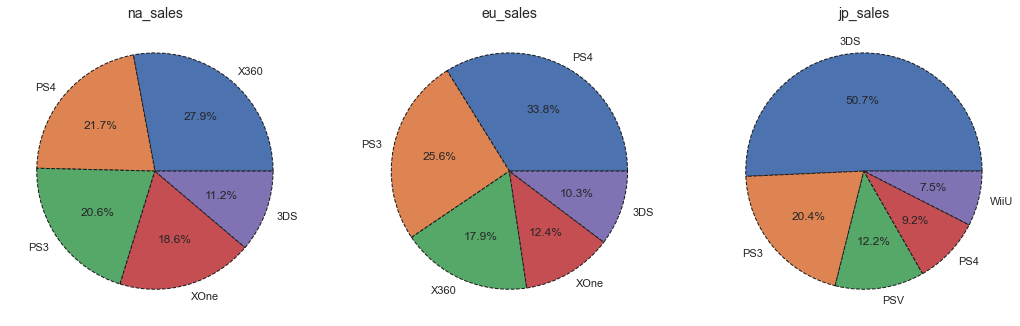

In [74]:
# доли среди Топ-5 платформ по регионам  
sales_top5_param_by_region('platform', head=5)

In [75]:
# доли Топ-5 платформ по отношению ко всем продажм в регионе 
for i in ['na_sales','eu_sales','jp_sales']:
     print('Доля продаж Топ-5 платформ по отношению ко всем продажам в регионе ', i, ' ',
           round(data.groupby("platform")[i].sum().head().sum() / data.groupby('platform')[i].sum().sum(),2)*100,'%', sep='')

Доля продаж Топ-5 платформ по отношению ко всем продажам в регионе na_sales 52.0%
Доля продаж Топ-5 платформ по отношению ко всем продажам в регионе eu_sales 69.0%
Доля продаж Топ-5 платформ по отношению ко всем продажам в регионе jp_sales 91.0%


In [76]:
# доли Топ-1 платформы по отношению ко всем продажм в регионе 
for i in ['na_sales','eu_sales','jp_sales']:
     print('Доля продаж Топ-1 платформы по отношению ко всем продажам в регионе ', i, ' ',
           round(data.groupby("platform")[i].sum().head(1).sum() / data.groupby('platform')[i].sum().sum(),3)*100,'%', sep='')

Доля продаж Топ-1 платформы по отношению ко всем продажам в регионе na_sales 9.9%
Доля продаж Топ-1 платформы по отношению ко всем продажам в регионе eu_sales 8.7%
Доля продаж Топ-1 платформы по отношению ко всем продажам в регионе jp_sales 50.2%


**комментарии, промежуточные вводы:**
- в регионе na_sales Топ-5 платформ  - X360', 'PS4', 'PS3', 'XOne', '3DS';
- в регионе eu_sales Топ-5 платформ  - 'PS4', 'PS3', 'X360', 'XOne', '3DS';
- в регионе jp_sales Топ-5 платформ  - '3DS', 'PS3', 'PSV', 'PS4', 'WiiU';

- в регионе NA доля первых пяти платформ занимают - 52%, в регионах EU и JP 69% и 91% процентов соответственно,  
  видимо в регионе NA у потребителей больше выбор или предпочтения по различным платформам, в регионах EU и JP или меньше выбор платформ или больше предпочтения потребителей среди лидеров рынка; 


**жанры**

In [77]:
# выведем Топ-5 жанров по регионам
for i in ['na_sales','eu_sales','jp_sales']:
    print('Топ-5 жанров в регионе',i)
    print(data.groupby('genre')[i].sum().sort_values(ascending=False).head())
    print()

Топ-5 жанров в регионе na_sales
genre
Action          171.09
Shooter         144.81
Sports           80.26
Role-Playing     60.76
Misc             29.36
Name: na_sales, dtype: float64

Топ-5 жанров в регионе eu_sales
genre
Action          155.22
Shooter         113.49
Sports           68.03
Role-Playing     46.81
Racing           27.28
Name: eu_sales, dtype: float64

Топ-5 жанров в регионе jp_sales
genre
Role-Playing    58.16
Action          48.75
Misc            11.35
Simulation      10.27
Shooter          9.23
Name: jp_sales, dtype: float64



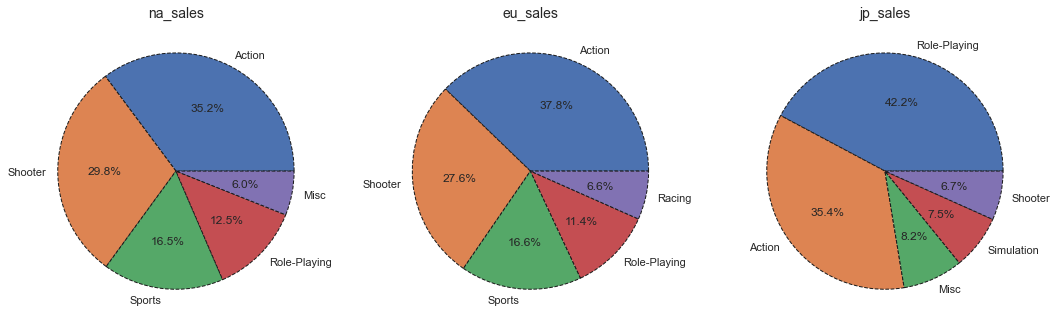

In [78]:
# доли среди Топ-5 платформ по жанрам
sales_top5_param_by_region('genre', head=5)

**комментарии, промежуточные вводы:**
- в регионах NA и EU практически нет различия в Топ-5 жанрах, вероятно сказывается близость культур Сев.Америки и 
  Европы и глобальный маркетинг
- в Японии есть отличия, больше предпочитают жанр Role-Playing, а также в Топ-5 присутствует жанр Platform

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр.

- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):

- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.

- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

In [79]:
# рассмотрим рейтинг ESRB, сначала заменим значения nan на 'нет значения'
data['rating'] = data['rating'].fillna('нет значения')
data['rating'].unique()

array(['M', 'нет значения', 'E', 'T', 'E10+'], dtype=object)

In [80]:
# выведем общие значения, число игр с рейтингом и без него
data['rating'].value_counts(dropna=False)

нет значения    1076
M                498
T                410
E                364
E10+             288
Name: rating, dtype: int64

In [81]:
data.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc=('sum'))

,eu_sales,jp_sales,na_sales
rating,,,
E,108.98,26.80,110.86
E10+,46.67,7.86,61.92
M,193.96,21.20,231.57
T,52.96,25.83,66.20
нет значения,88.63,93.43,99.20


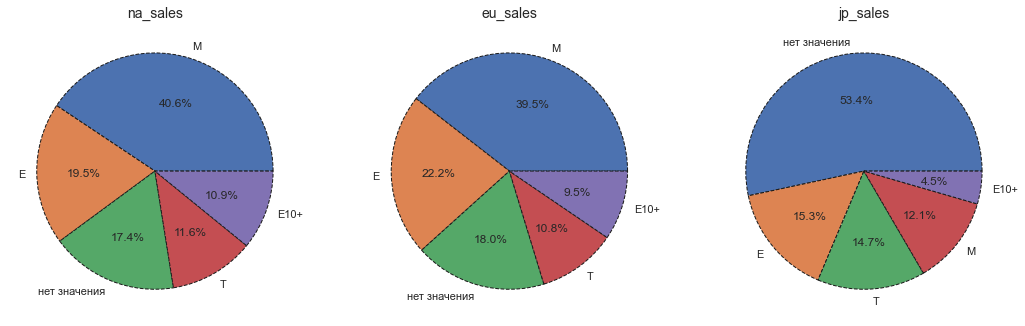

In [82]:
sales_top5_param_by_region('rating', head=7)

**комментарии, промежуточные вводы по ESRB в регионах:**
- в регионах Сев.Америки и Европы практически нет различий - большую долю занимает игры с рейтингом M, E;
- есть отличия в Японии, где меньше покупают игр с рейтингом M (для взрослых), которые содержат сцены насилья;
- скорее всего рейтинг ESRB не влияет на продажи, пользователи предпочитают Жанр игры, Качество ПО игры, удобство Платформы

**дополнительный анализ - соотношение продаж top-500 игр ко всем продажам**

In [83]:
all_sales_2012 = data.groupby('name')['all_sales'].sum().sum()
top_500_sales_2012 = data.groupby('name')['all_sales'].sum().sort_values(ascending=False).head(500).sum()

print('количество игр с 2012 = ', len(data), 'реализов')
print('все продажи с 2012г = ', round(all_sales_2012), 'млн.копий')
print('продажи top-500 игр = ', round(top_500_sales_2012), 'млн.копий')
print('доля продаж top-500 игр ко всем продажам с 2012 = ', round(top_500_sales_2012 / all_sales_2012,2) * 100,'%', sep='')

количество игр с 2012 =  2636 реализов
все продажи с 2012г =  1389 млн.копий
продажи top-500 игр =  1287 млн.копий
доля продаж top-500 игр ко всем продажам с 2012 = 93.0%


**дополнительный анализ - соотношение продаж по регионам**

In [84]:
regions = ['na_sales','eu_sales','jp_sales', 'other_sales']
total_sales_of_region = [data[i].sum() for i in regions] 

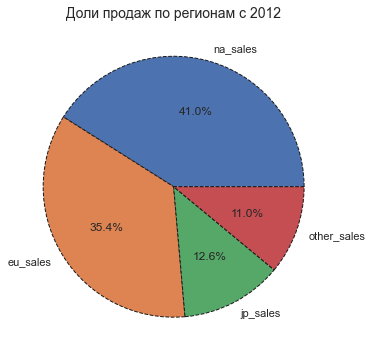

In [85]:
plt.figure(figsize=(18,6))
plt.pie(total_sales_of_region, labels=regions, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
plt.title('Доли продаж по регионам c 2012', fontsize=14)
plt.show()

Доли продаж по регионам с 2012:

   - na_sales - 41%
   - eu_sales - 35.4%
   - jp_sales - 12.6%
   - other_sales - 11%

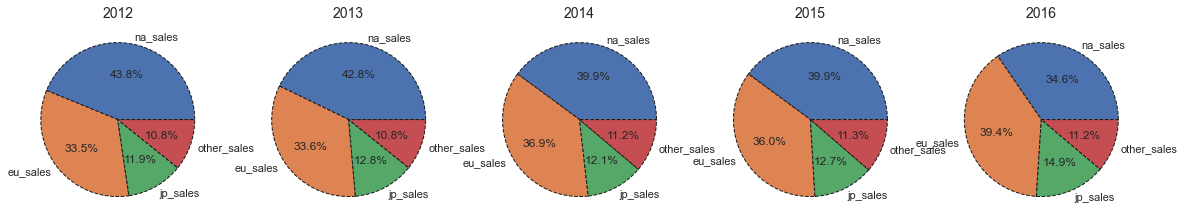

In [86]:
# доли продаж по регионам по годам с 2012
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

for k, j in enumerate(years_list_2012):
    dd = data.loc[data['year_of_release']==j]
    total_sales_of_region = [dd[i].sum() for i in regions]
    ax[k].pie(total_sales_of_region, labels=regions, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
    ax[k].set_title(j, fontsize=14)    


доли продаж по регионам по годам с 2012:

   - na_sales - чуть уменьшилась с 43.8% до 34% 
   - eu_sales - выросла с 33.5% до 39.4%
   - jp_sales - выросла с 11.9% до 14.9%
   - other_sales - пости не изменилась с 10.8% до 11.2%

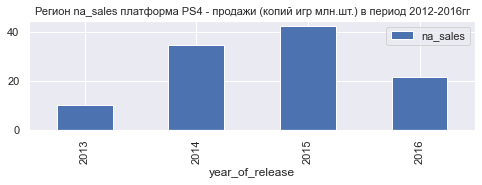

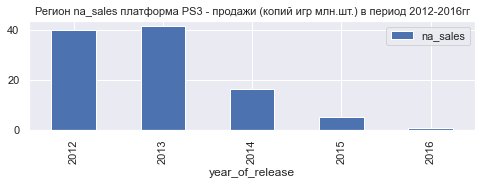

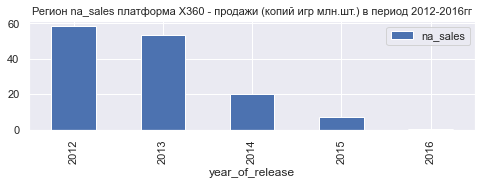

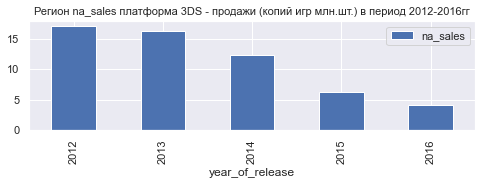

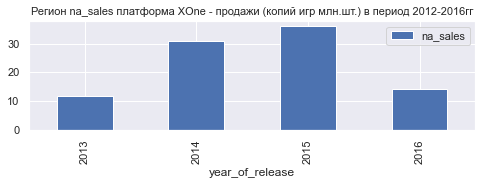

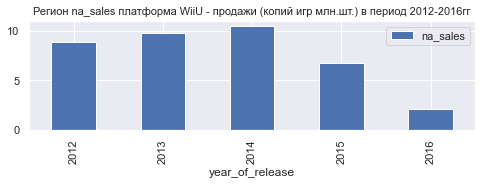

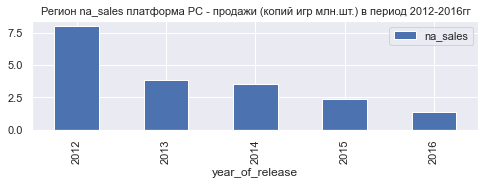

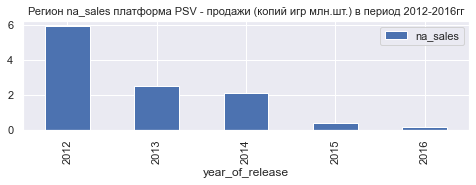

In [87]:
# распределение продаж платформ по регионам по годам из списка top_sales_platforms в период 2012-2016гг
for name in top_sales_platforms:
    data[data['platform']==name].groupby('year_of_release')['na_sales'].sum().\
            reset_index().plot(kind='bar', x='year_of_release', figsize=(8,2), grid=True); 
    plt.title(f'Регион na_sales платформа {name} - продажи (копий игр млн.шт.) в период 2012-2016гг', fontsize=11)
    plt.show()

# Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- 	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
-	Как вы сформулировали нулевую и альтернативную гипотезы;
-	Какой критерий применили для проверки гипотез и почему.



**в данном блоке используем весь dataframe - games**

**проверка "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", сформируем гипотезы и выберем alpha**
- H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые      - нулевая гипотеза
- H_a: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые     - альтернативная гипотеза
- alpha = 0.01

**обосновение alpha = 0.01**

многие эксперты считают, что 0.05 это не достаточный уровень, чтобы избежать ошибок, нужно брать 0.01 или ниже, в частности ниже приведенно мнение Профессора Профессор Техасского университета Валена Джонсона

"...Чтобы защитить добросовестных ученых от подобных ложных выводов, специалист по статистике предлагает пересмотреть общепринятую договоренность о том, какие же результаты считать значимыми. По мнению Джонсона, даваемое вероятностным подходом значение 0,05 надо снизить до 0,005: его анализ показывает, что работы с p<0,005 почти наверняка выдержат дополнительные проверки. За рост точности, по словам ученого, придется платить увеличением количества измерений и удорожанием опытов, но приложенные к его статье расчеты говорят об окупаемости подобных расходов. Объем опытной работы вырастет меньше, чем вдвое, а доля ошибочных выводов упадет примерно с 20 до 4 процентов, то есть в пять раз..."

https://lenta.ru/news/2013/11/12/inbayeswetrust/
 
 
 
 

In [88]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16712 non-null  category
 1   platform         16712 non-null  object  
 2   year_of_release  16712 non-null  int32   
 3   genre            16712 non-null  category
 4   na_sales         16712 non-null  float64 
 5   eu_sales         16712 non-null  float64 
 6   jp_sales         16712 non-null  float64 
 7   other_sales      16712 non-null  float64 
 8   critic_score     8136 non-null   float64 
 9   user_score       7589 non-null   float64 
 10  rating           9948 non-null   object  
 11  all_sales        16712 non-null  float64 
dtypes: category(2), float64(7), int32(1), object(2)
memory usage: 1.7+ MB


In [89]:
# сделаем выборки user_score платформ XOne и PC,  
# рассчитаем дисперсии и сравним

user_score_XOne = games.loc[games['platform'] == 'XOne']['user_score'].dropna().reset_index()
user_score_PC = games.loc[games['platform'] == 'PC']['user_score'].dropna().reset_index()

print('дисперия user_score_XOne =', round(np.var(user_score_XOne['user_score']),2))
print('дисперия user_score_PC =', round(np.var(user_score_PC['user_score']),2))
print('дисперии равны =', np.var(user_score_XOne['user_score']) == np.var(user_score_PC['user_score']))
print('количество оценок', 'user_score_XOne =',len(user_score_XOne), 'user_score_PC =', len(user_score_PC))

дисперия user_score_XOne = 1.9
дисперия user_score_PC = 2.34
дисперии равны = False
количество оценок user_score_XOne = 182 user_score_PC = 770


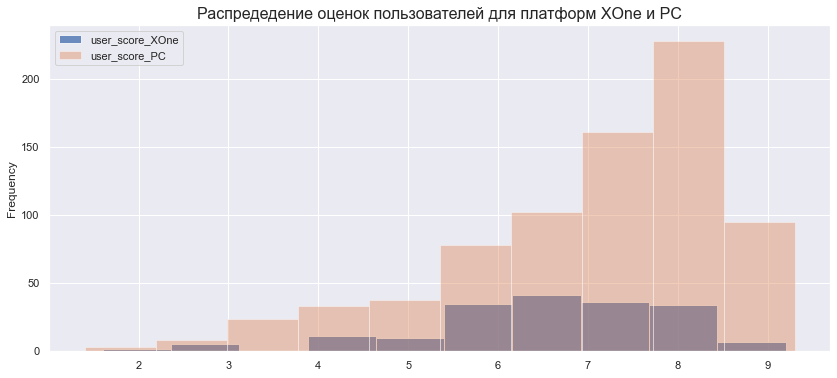

In [90]:
# распредедение оценок пользователей для платформ XOne и PC 
ax = user_score_XOne.plot(kind='hist', y='user_score', alpha=0.8, label='user_score_XOne');
user_score_PC.plot(kind='hist', y='user_score', ax=ax, alpha=0.4, label='user_score_PC', legend=True, figsize=(14,6));
plt.title('Распредедение оценок пользователей для платформ XOne и PC', fontsize=16)
plt.show()

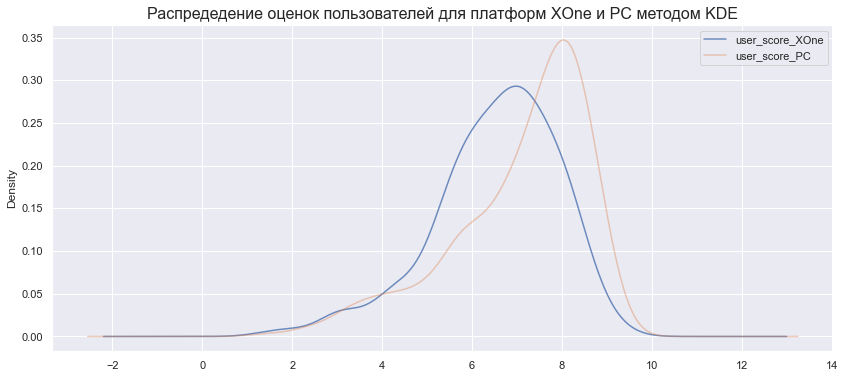

In [91]:
# распредедение оценок пользователей для платформ XOne и PC методом KDE
ax = user_score_XOne.plot(kind='kde', y='user_score',alpha=0.8, label='user_score_XOne');
user_score_PC.plot(kind='kde', y='user_score', ax=ax, alpha=0.4, label='user_score_PC', legend=True, figsize=(14,6));
plt.title('Распредедение оценок пользователей для платформ XOne и PC методом KDE', fontsize=16)
plt.show()

**обоснование метода**
- Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, нужно применить метод scipy.stats.ttest_ind()
- дисперсии выборок не равны, значит при расчете p_value используем аргумент 'equal_var = False'

In [92]:
# функция для проверки статистических гипотез методом scipy.stats.ttest_ind()
def stat_test_ind(df1, df2, equal_var=bool, alpha=0.05):
    
    results = st.ttest_ind(df1, df2, equal_var = equal_var)
    
    alpha = alpha
    
    if results.pvalue < alpha:
        print('Значения p-value равно', results.pvalue)
        print('Отвергаем нулевую гипотезу ')
    else:
        print('Значения p-value равно', results.pvalue )
        print('Не отвергаем нулевую гипотезу')
        
    print('Средние значения выборок равны:', round(df1.mean(),2), 'и', round(df2.mean(),2))

In [93]:
# проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

stat_test_ind(df1=user_score_XOne['user_score'], df2=user_score_PC['user_score'], equal_var = False, alpha = 0.1)

Значения p-value равно 4.935072360183565e-06
Отвергаем нулевую гипотезу 
Средние значения выборок равны: 6.52 и 7.06


**проверка "Средние пользовательские рейтинги жанров Action и Sports разные", сформируем гипотезы и выберем alpha**

- H_0: Средние пользовательские рейтинги жанров Action и Sports разные  - нулевая гипотеза
- H_a: Средние пользовательские рейтинги жанров Action и Sports равны   - альтернативная гипотеза
- alpha = 0.01

In [94]:
# сделаем выборки user_score жанров Action и Sports 
# рассчитаем дисперсии и сравним

user_score_Action = games.loc[games['genre'] == 'Action']['user_score'].dropna().reset_index()
user_score_Sports = games.loc[games['genre'] == 'Sports']['user_score'].dropna().reset_index()
print('дисперия user_score_Action =', round(np.var(user_score_Action['user_score']),2))
print('дисперия user_score_Sports =', round(np.var(user_score_Sports['user_score']),2))
print('дисперии равны =', np.var(user_score_Action['user_score']) == np.var(user_score_Sports['user_score']))
print('количество оценок', 'user_score_Action =',len(user_score_Action), 'user_score_Sports =', len(user_score_Sports))

дисперия user_score_Action = 2.03
дисперия user_score_Sports = 2.59
дисперии равны = False
количество оценок user_score_Action = 1830 user_score_Sports = 1102


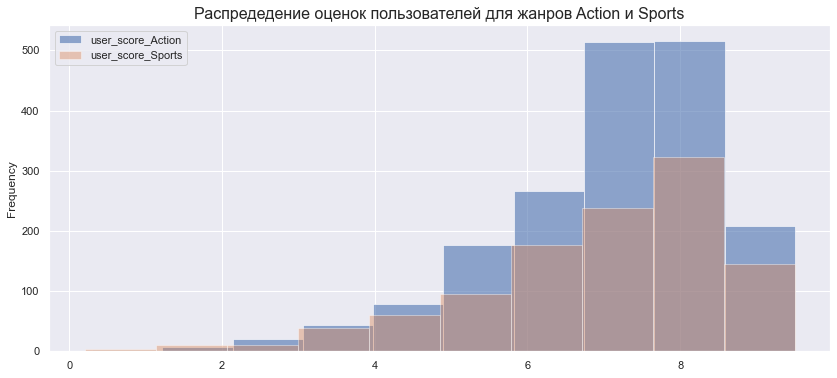

In [95]:
# распредедение оценок пользователей для жанров Action и Sports 
ax = user_score_Action.plot(kind='hist', y='user_score',alpha=0.6, label='user_score_Action');
user_score_Sports.plot(kind='hist', y='user_score', ax=ax, alpha=0.4, label='user_score_Sports', legend=True, figsize=(14,6));
plt.title('Распредедение оценок пользователей для жанров Action и Sports', fontsize=16)
plt.show()

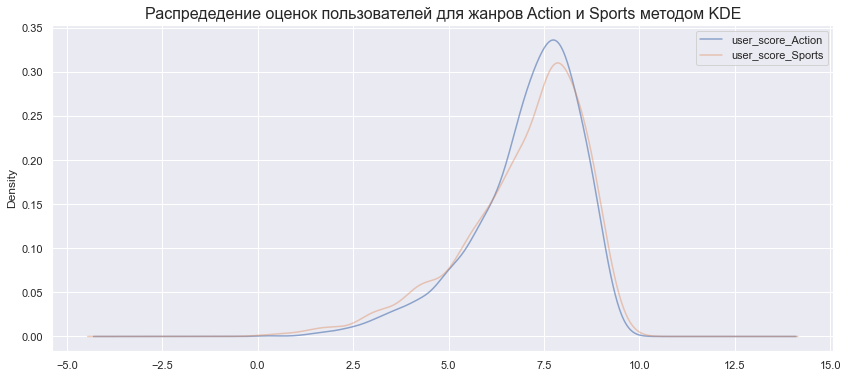

In [96]:
# распредедение оценок пользователей для жанров Action и Sports методом KDE
ax = user_score_Action.plot(kind='kde', y='user_score',alpha=0.6, label='user_score_Action');
user_score_Sports.plot(kind='kde', y='user_score', ax=ax, alpha=0.4, label='user_score_Sports', legend=True, figsize=(14,6));
plt.title('Распредедение оценок пользователей для жанров Action и Sports методом KDE', fontsize=16)
plt.show()

**обоснование метода**

- Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, нужно применить метод scipy.stats.ttest_ind()
- дисперсии выборок не равны, значит при расчете p_value используем аргумент 'equal_var = False'

In [97]:
# проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные"

stat_test_ind(df1=user_score_Action['user_score'], df2=user_score_Sports['user_score'], equal_var = False, alpha = 0.1)

Значения p-value равно 0.12024530426190537
Не отвергаем нулевую гипотезу
Средние значения выборок равны: 7.05 и 6.96


**выводы по п.5**

- выдвинули гипотезы, определили  alpha = 0.01, применили метод для проверки равенстве среднего двух генеральных совокупностей по взятым из них выборкам scipy.stats.ttest_ind()
- нулевая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - отвергаем эту гипотезу
- нулевая гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" - не отвергаем эту гипотезу


# Шаг 6. Напишите общий вывод

На основе проведенного анализа на мой взгляд можно сделать сдедующие выводы:

Закономерности успешности игры:

1. Игры д.б. в жанрах: 
     - для Сев.Америки и Европы - Aсtion, Shooter, Sports, Role-plaing, Misc
     - для Японии - Role-Playing, Action, Misc, Shooter 
     
     - в Японии нужно учитывать, что Role-Playing занимает 50% рынка
     - для Сев.Америки и Европы потребители предпочитают по рейтингу ESRB -  «M» («Mature») «Для взрослых» 
     
     
2. Платформы с учетом жизненого цикла платформ и на с учетом прогноза на 2017г.:
    - Сев.Америка: PS4, XOne, 3DS, WiiU, PS 
    - Европа: PS4, XOne, 3DS, WiiU, PS, PSV
    - Япония: 3DS, PS3, PS4, WiiU, PSV  - в Японии нужно учитывать, что 3DS занимает 50% рынка
    
   Платформа дает удобство играть и функциональность - это очень важные факторы, поэтому top-5 платформ на всех рынках получают 50% и более доли рынка;
    

3. Качество самой игры - качество ПО, новизна или новая версия популярной игры - это подтверждает факт, что top-500 игр из 2600 дают порядка 93% продаж;


4. Рейтинг экспертов - можно предположить что многие эксперты и сами игроки, делают обзоры по играм, где детально разбирают игры, т.е. их мнение достаточно объективно и на их мнение ориентируется аудитория;


5. По регионам по емкости рынка - лидирует регион Сев.Америки, но за период 2012 он снизил долю рынка и выросли доли Европы и Японии, Европа в 2015 догнала по объему рынка регион Сев.Америки;


6. Одельное примечания - важен такой факт, что в жанрах Shooter, Platform, Sports, Role-Playing - наибольшее среднее значение проданных копий игр на 1 реализ. Этот факт говорит о том, что затраты на разработку 1 игры (реализа) в этих жанрах будут быстрее окупаться, чем других жанрах, т.к. 1 уже сделанную игру (реализ) больше покупают в среднем;